In [1]:
# Import the library
import pandas as pd 

In [3]:
# Import the CSV file
df = pd.read_csv("MonthlyProductSales.csv")

In [4]:
df.head()

,Month of Order Date,Product Name,Sales
0,2013-05-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",208.0
1,2015-06-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",208.0
2,2013-11-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",333.0
3,2016-07-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",416.0
4,2016-11-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  9252 non-null   object 
 1   Product Name         9252 non-null   object 
 2   Sales                9252 non-null   float64
dtypes: float64(1), object(2)
memory usage: 217.0+ KB


In [6]:
#Descriptive Statistics
df.describe()

,Sales
count,9252.000000
mean,248.308798
std,669.441779
min,0.000000
25%,18.000000
50%,60.000000
75%,222.000000
max,22638.000000


In [7]:
# Count of products
pn = df['Product Name']
pn.value_counts(dropna=False)

Easy-staple paper                                       32
Staple envelope                                         30
Staples                                                 30
Staples in misc. colors                                 18
KI Adjustable-Height Table                              14
                                                        ..
Xerox WorkCentre 6505DN Laser Multifunction Printer      1
Zebra GK420t Direct Thermal/Thermal Transfer Printer     1
Sony 8GB Class 10 Micro SDHC R40 Memory Card             1
Plantronics Single Ear Headset                           1
Star Micronics TSP100 TSP143LAN Receipt Printer          1
Name: Product Name, Length: 1850, dtype: int64

In [8]:
# Year of Order Date
df['Month of Order Date'].str[:4]

0       2013
1       2015
2       2013
3       2016
4       2016
        ... 
9247    2016
9248    2016
9249    2013
9250    2016
9251    2013
Name: Month of Order Date, Length: 9252, dtype: object

In [9]:
df.groupby(df['Month of Order Date'].str[:4]).describe()

Sales                                                   \
                      count        mean         std  min   25%   50%     75%   
Month of Order Date                                                            
2013                 1875.0  258.267200  803.537374  1.0  17.0  55.0  224.00   
2014                 1968.0  239.107215  521.330289  1.0  19.0  62.0  225.25   
2015                 2400.0  253.550833  711.795040  1.0  19.0  58.5  222.00   
2016                 3009.0  243.940512  627.741547  0.0  18.0  60.0  221.00   

                              
                         max  
Month of Order Date           
2013                 22638.0  
2014                  7312.0  
2015                 17500.0  
2016                 14000.0

In [11]:
# Descriptive Statistics by year
df.groupby(df['Month of Order Date'].str[:4]).describe().reset_index().rename(columns = {"Month of Order Date":"Year"})

Year   Sales                                                          
          count        mean         std  min   25%   50%     75%      max
0  2013  1875.0  258.267200  803.537374  1.0  17.0  55.0  224.00  22638.0
1  2014  1968.0  239.107215  521.330289  1.0  19.0  62.0  225.25   7312.0
2  2015  2400.0  253.550833  711.795040  1.0  19.0  58.5  222.00  17500.0
3  2016  3009.0  243.940512  627.741547  0.0  18.0  60.0  221.00  14000.0

In [12]:
yearly_product_sales = df.groupby([df['Month of Order Date'].str[:4], "Product Name"]).sum().reset_index()

In [14]:
# Rename Month of Order date to Year
yearly_product_sales.rename(columns = {"Month of Order Date":"Year"})

,Year,Product Name,Sales
0,2013,"#10 White Business Envelopes,4 1/8 x 9 1/2",156.0
1,2013,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",63.0
2,2013,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",23.0
3,2013,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",541.0
4,2013,1/4 Fold Party Design Invitations & White Enve...,6.0
...,...,...,...
5321,2016,iKross Bluetooth Portable Keyboard + Cell Phon...,67.0
5322,2016,iOttie HLCRIO102 Car Mount,120.0
5323,2016,iOttie XL Car Mount,224.0
5324,2016,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,205.0


In [15]:
# Distinct Product Sales by year
df.groupby("Product Name").sum().reset_index()

,Product Name,Sales
0,"""While you Were Out"" Message Book, One Form pe...",25.0
1,"#10 Gummed Flap White Envelopes, 100/Box",42.0
2,#10 Self-Seal White Envelopes,109.0
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",489.0
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.0
...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,479.0
1846,iOttie HLCRIO102 Car Mount,216.0
1847,iOttie XL Car Mount,224.0
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.0


In [16]:
# Import the Visualizing Libraries
import matplotlib.pyplot as plt

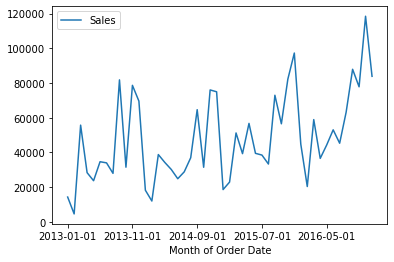

In [18]:
# A Simple plot of Sales by Order Date
df.groupby(df['Month of Order Date']).sum().plot()
plt.show()

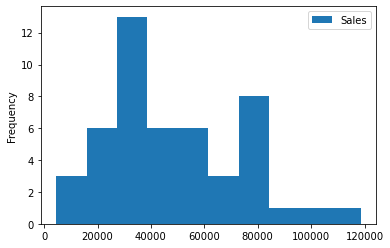

In [21]:
# Histogram plot of Sales
df.groupby(df['Month of Order Date']).sum().plot(kind='hist',bins=10)
plt.show()

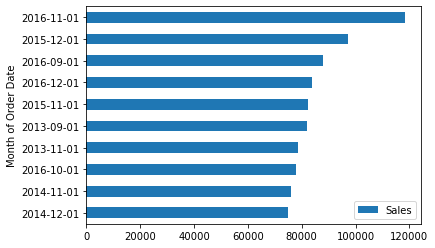

In [22]:
#Top 10 Sales by Order Date
df.groupby(df['Month of Order Date']).sum().sort_values(by='Sales').tail(10).plot(kind='barh')
plt.show()